# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path3 = '/content/drive/MyDrive/ML_HW3/credit_scoring_sample.csv'

df3 = pd.read_csv(file_path3 , sep = ';')

print(df3.columns)

Mounted at /content/drive
Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents'],
      dtype='object')


# Analysis

In [ ]:
data = df3
# data.sample(23)

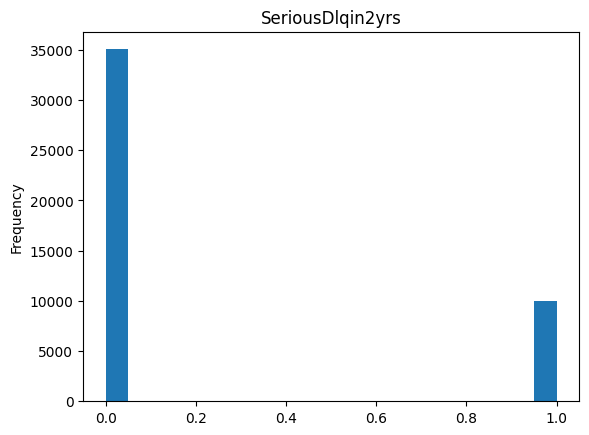

In [ ]:
# @title SeriousDlqin2yrs

from matplotlib import pyplot as plt
data['SeriousDlqin2yrs'].plot(kind='hist', bins=20, title='SeriousDlqin2yrs')
plt.gca().spines[['top', 'right',]].set_visible(True)

**filling Nan as median of the column**

In [ ]:
import pandas as pd

data = data.apply(lambda x: x.fillna(x.median()), axis=0)

# Print the updated DataFrame
# print(data)

# Bootstrapping

In [ ]:
# !pip install bootstrapped

**Confidence Level**

In [ ]:
import pandas as pd
import numpy as np

data_filtered = data[data['SeriousDlqin2yrs'] == 0]

n_bootstraps = 1000
confidence_level = 0.90

def bootstrap_confidence_interval(data, n_bootstraps, ci):
    bootstrap_samples = np.random.choice(data, size=(n_bootstraps, len(data)), replace=True)
    bootstrap_stats = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_stats, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(bootstrap_stats, (1 + ci) / 2 * 100)
    return lower_bound, upper_bound


age_confidence_interval = bootstrap_confidence_interval(data_filtered['age'].values, n_bootstraps, confidence_level)

print(f"The {confidence_level*100}% confidence interval for the 'age' column is: {age_confidence_interval}")

The 90.0% confidence interval for the 'age' column is: (52.60791163627023, 52.85553272255044)


# GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

# Set the target and features
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

# Define the parameters for grid search
param_grid = {
    'max_features': [1, 2, 4],
    'min_samples_leaf': [3, 5, 7, 9],
    'max_depth': [5, 10, 15]
}

# Create the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Create the stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=cv)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best ROC AUC score:", best_score)

Best parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 9}
Best ROC AUC score: 0.8352605392260977


**lowest effect on random forest**

In [ ]:
data = df3

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your DataFrame
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

# Fit a RandomForestClassifier with the best parameters
rf = RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=9)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=True)

# Display the feature with the lowest importance
print("Feature with the lowest importance:")
print(feature_importances_df.iloc[0])

Feature with the lowest importance:
Feature       NumberOfDependents
Importance              0.013791
Name: 6, dtype: object


In [ ]:
for i in range(len(feature_importances_df)):
  print(feature_importances_df.iloc[i])

Feature       NumberOfDependents
Importance              0.013791
Name: 6, dtype: object
Feature       MonthlyIncome
Importance         0.052535
Name: 5, dtype: object
Feature       DebtRatio
Importance     0.065666
Name: 2, dtype: object
Feature            age
Importance    0.079082
Name: 0, dtype: object
Feature       NumberOfTime60-89DaysPastDueNotWorse
Importance                                0.183924
Name: 4, dtype: object
Feature       NumberOfTime30-59DaysPastDueNotWorse
Importance                                0.235483
Name: 1, dtype: object
Feature       NumberOfTimes90DaysLate
Importance                   0.369517
Name: 3, dtype: object


<!-- The purpose of this part is to find the optimal bagging classifier from among the set of parameters given below,

parameters :
{
  'max_features' : [2 , 3 , 4] ,
  'max_samples' : [0.5 , 0.7 , 0.9]
  'base_estimator_C' : [0.0001 , 0.001 , 0.01 , 1 , 10 , 100]
}
by RandomizedSearch method.
For this, use the logistic regression classifier as the base classifier.
Consider the number of classifiers as 100.
To save time, consider the number of iterations of RandomizedSearchCV as 20 and use the stratified 5-fold validation evaluation scale.
Report the ROC value for the optimal classifier. -->

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

param_dist = {
    'max_features': [2, 3, 4],
    'max_samples': [0.5, 0.7, 0.9],
    'base_estimator__C': [0.0001, 0.001, 0.01, 1, 10, 100]
}

# Create the logistic regression classifier
base_estimator = LogisticRegression()

# Create the bagging classifier
bagging = BaggingClassifier(estimator = base_estimator, n_estimators=100)

# Create the stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=bagging, param_distributions=param_dist, scoring='roc_auc', cv=cv, n_iter=20)
random_search.fit(X, y)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best ROC AUC score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

Best parameters: {'max_samples': 0.5, 'max_features': 2, 'base_estimator__C': 1}
Best ROC AUC score: 0.7688710209338883
